# TCR Clonotypes

In [2]:
import sys
import numpy as np
sys.path.insert(0, "../..")
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
import tarfile
import anndata
import warnings
from matplotlib import pyplot as plt
from numba import NumbaPerformanceWarning

# ignore numba performance warnings
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

# suppress "storing XXX as categorical" warnings.
anndata.logging.anndata_logger.setLevel("ERROR")

In [3]:
tcr_and_rna_combined = sc.read('/scratch/tcr_and_rna_combined.h5ad')

In [5]:
ir.pp.tcr_neighbors(
    tcr_and_rna_combined,
    metric="alignment",
    sequence="aa",
    cutoff=15,
    receptor_arms="all",
    dual_tcr="all",
)

100%|██████████| 4403122/4403122 [00:25<00:00, 172929.68it/s]


In [10]:
ir.tl.define_clonotype_clusters(tcr_and_rna_combined, partitions="connected", sequence="aa", metric="alignment")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaa2ac8b00>],
      dtype=object)

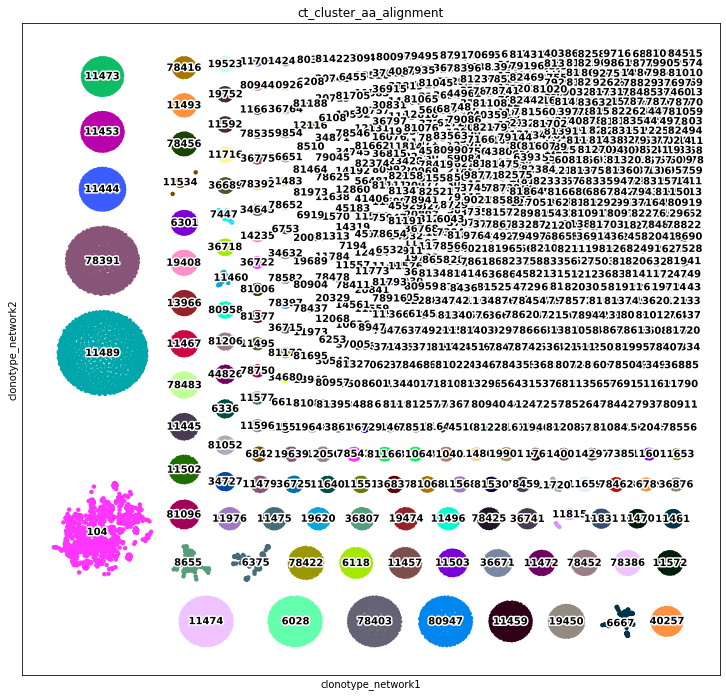

In [11]:
ir.tl.clonotype_network(tcr_and_rna_combined, min_size=5, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    tcr_and_rna_combined,
    color="ct_cluster_aa_alignment",
    legend_fontoutline=3,
    size=80,
    panel_size=(12, 12),
    legend_loc="on data",
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f79fa7c3ef0>],
      dtype=object)

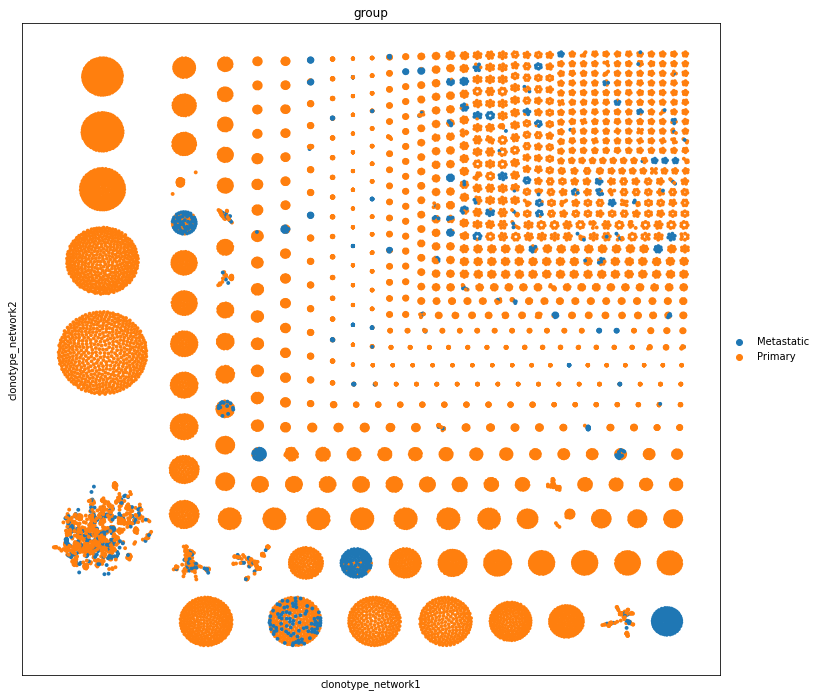

In [7]:
ir.pl.clonotype_network(tcr_and_rna_combined, color="group", size=60, panel_size=(12, 12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ab5fd2b00>],
      dtype=object)

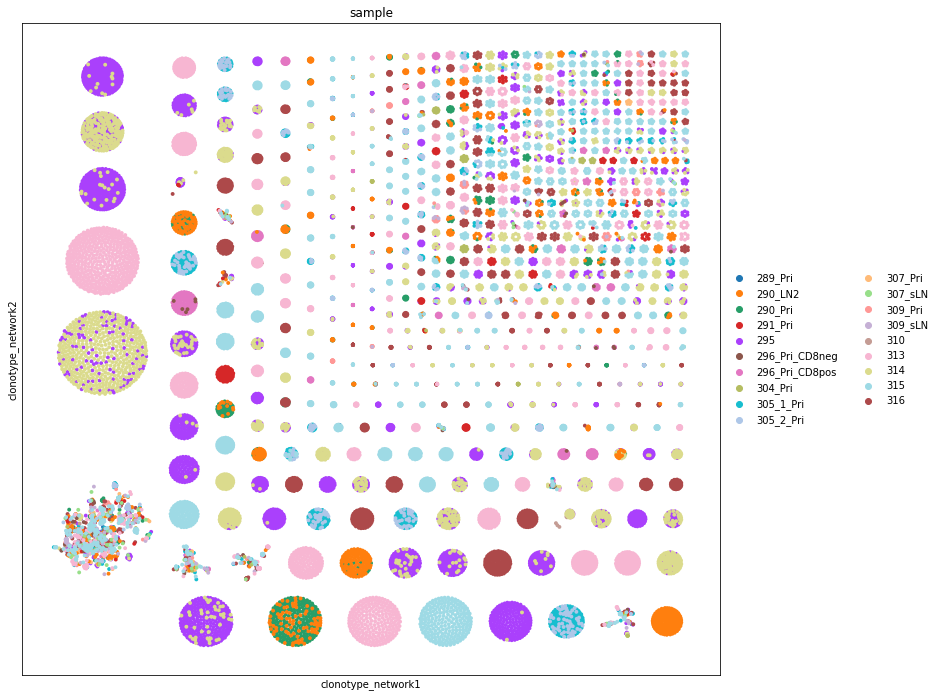

In [8]:
ir.pl.clonotype_network(tcr_and_rna_combined, color="sample", size=60, panel_size=(12, 12))

In [9]:
tcr_and_rna_combined.obs.loc[
    tcr_and_rna_combined.obs["ct_cluster_aa_alignment"] == "80947",
    ["TRA_1_cdr3", "TRA_2_cdr3", "TRB_1_cdr3", "TRB_2_cdr3"],
]

,TRA_1_cdr3,TRA_2_cdr3,TRB_1_cdr3,TRB_2_cdr3
AAAGATGCAATGTTGC-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
AAAGTAGTCCTCAATT-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
AACCGCGAGATATGGT-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
AACCGCGAGTAGGCCA-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
AACTCCCCAACTTGAC-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
...,...,...,...,...
TTGCCGTGTCGCTTCT-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
TTGGAACAGACTAGGC-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
TTGTAGGTCCCAAGAT-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
TTTCCTCTCGCCTGTT-1-18,CAFRGGSGGSYIPTF,None,CSVDATFTEEAFF,None
